In [79]:
# SVM
# Support vector machines (SVMs) are a set of supervised learning methods used for 
# classification, regression and outliers detection.

# The advantages of support vector machines are:
    # Effective in high dimensional spaces.
    # Still effective in cases where number of dimensions is greater than the number of samples.
    # Uses a subset of training points in the decision function (called support vectors), 
    # so it is also memory efficient.
    # Versatile: different Kernel functions can be specified for the decision function. 
    # Common kernels are provided, but it is also possible to specify custom kernels.

# The disadvantages of support vector machines include:
    # If the number of features is much greater than the number of samples, avoid over-fitting 
    # in choosing Kernel functions and regularization term is crucial.
    # SVMs do not directly provide probability estimates, these are calculated using an 
    # expensive five-fold cross-validation (see Scores and probabilities, below).

# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', 
# coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, 
# decision_function_shape='ovr', break_ties=False, random_state=None)

from sklearn import svm
import pandas as pd
import numpy as np

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [81]:
# Separating apple from orange (fruits)
# 
fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
print(lookup_fruit_name)

# selecting apple and orange
select = (fruits["fruit_label"]==2)|(fruits["fruit_label"]==3) 
fruits = fruits.loc[select, :]
print(fruits.head())

X = fruits[['width', 'color_score']] #mass, width, height, color_score
y = fruits['fruit_label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  \
        train_test_split(X, y, test_size=.30, random_state=42)

# kernals could be: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’.              
clf = svm.SVC(kernel="linear", C=1000, probability=True)

clf.fit(X_train, y_train)
print("accuracy train (%): ", clf.score(X_train, y_train)*100)
print("accuracy test (%): ", clf.score(X_test, y_test)*100)
print("test data:\n", X_test)
print("predicted probabilities:\n", clf.predict_proba(X_test))


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
5            2   mandarin      mandarin    80    5.8     4.3         0.77
6            2   mandarin      mandarin    80    5.9     4.3         0.81
7            2   mandarin      mandarin    76    5.8     4.0         0.81
accuracy train (%):  100.0
accuracy test (%):  100.0
test data:
     width  color_score
27    7.5         0.77
35    7.1         0.75
3     6.2         0.80
37    7.3         0.79
30    7.1         0.79
28    6.7         0.72
32    7.2         0.80
4     6.0         0.79
predicted probabilities:
 [[0.069 0.931]
 [0.140 0.860]
 [0.488 0.512]
 [0.100 0.900]
 [0.141 0.859]
 [0.262 0.738]
 [0.119 0.881]
 [0.585 0.415]]


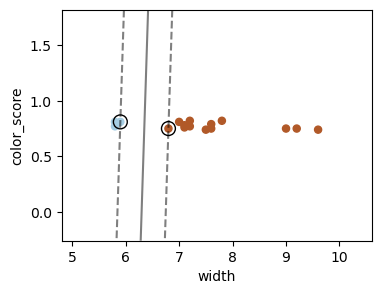

In [83]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
plt.rc("figure", figsize=(4, 3))

X = X_train
y = y_train

plt.scatter(X.loc[:, "width"], X.loc[:, "color_score"], 
            c=y, s=26, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [85]:
#### See which data points are critical #####
# get the support vectors
print("clf support vectors: {}".format(clf.support_vectors_))
# get indices of support vectors
print("clf support vector indices: {}".format(clf.support_))
# get number of support vectors for each class
print("clf # of support vectors in each class: {}".format(clf.n_support_))

clf support vectors: [[5.900 0.810]
 [6.800 0.750]]
clf support vector indices: [5 9]
clf # of support vectors in each class: [1 1]


In [87]:
#
# Separating fruits
# 
fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

fruits.head()

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  \
        train_test_split(X, y, test_size=.25, random_state=42)

# kernals could be: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. Try them.               
clf = svm.SVC(kernel='linear', C=10000)
                    
clf.fit(X_train, y_train)

print("accuracy train : ", clf.score(X_train, y_train))
print("accuracy test : ", clf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted = clf.predict(X_test)
print("confusion matrix:\n", confusion_matrix(y_test, y_predicted))

accuracy train :  0.8636363636363636
accuracy test :  0.8
confusion matrix:
 [[2 0 2 0]
 [0 2 0 0]
 [1 0 3 0]
 [0 0 0 5]]


<Figure size 600x500 with 0 Axes>

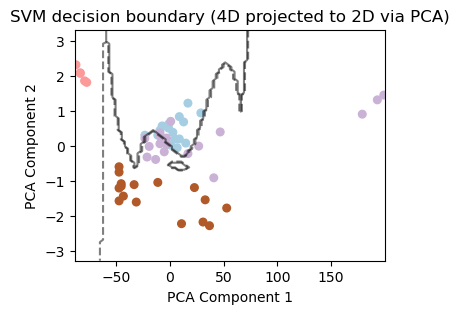

In [89]:
# visualizing

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# Load dataset
fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
X = fruits[['height', 'width', 'mass', 'color_score']].to_numpy()
y = fruits['fruit_label'].to_numpy() 

# Train SVM on full 4D data --> use it for prediction
# kernals could be: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. Try them.  
kernal = 'rbf'
clf = svm.SVC(kernel=kernal, C=10000)
clf.fit(X, y)

# --- Project to 2D for visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit another SVM *on the PCA-reduced data* for plotting; 
clf_pca = svm.SVC(kernel=kernal, C=10000)
clf_pca.fit(X_pca, y)

# --- Plot decision boundary in 2D ---
plt.figure(figsize=(6,5))
DecisionBoundaryDisplay.from_estimator(
    clf_pca,
    X_pca,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.title("SVM decision boundary (4D projected to 2D via PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


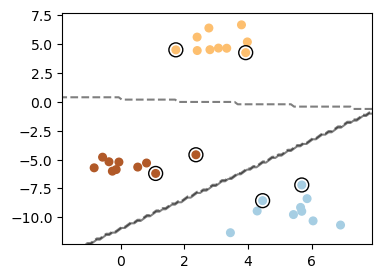

In [91]:
# example from scikit learn

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=30, centers=3, random_state=10)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()